In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_excel('nuclear_safety_q4_2025.xlsx')

Перевіримо гіпотезу 1. про те, що ЗАЕС матиме найбільший індекс скиду серед всіх станцій, так як має найбільші блоки.

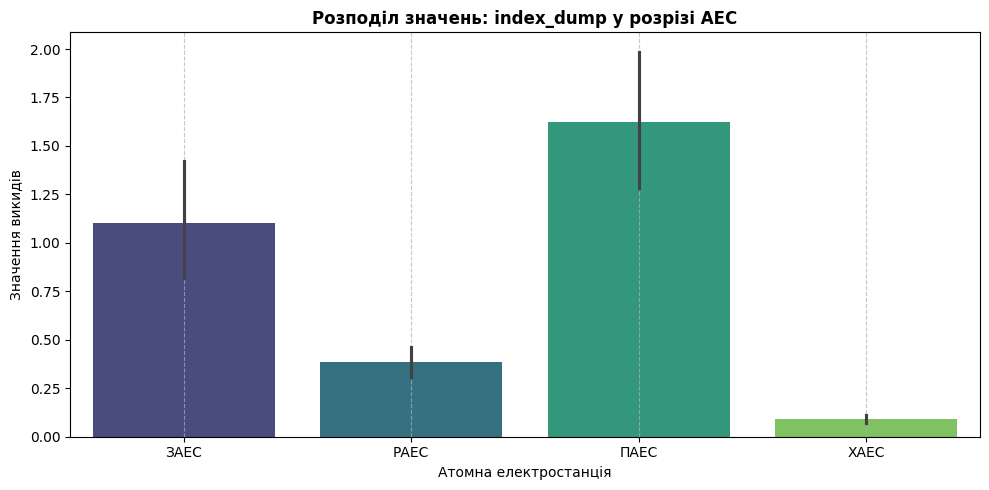

In [ ]:
plt.figure(figsize=(10, 5))

sns.barplot(data=df, x='station', y='index_dump', palette='viridis', hue='station', legend=False)

plt.title(f'Розподіл значень: index_dump у розрізі АЕС', fontsize=12, fontweight='bold')
plt.ylabel('Значення викидів', fontsize=10)
plt.xlabel('Атомна електростанція', fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

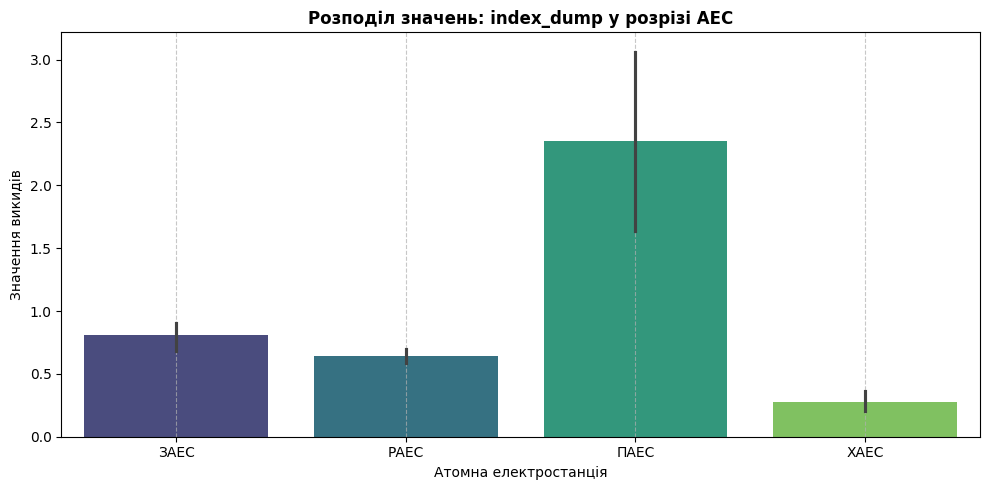

In [ ]:
plt.figure(figsize=(10, 5))

sns.barplot(data=df, x='station', y='index_radioactive_releas', palette='viridis', hue='station', legend=False)

plt.title(f'Розподіл значень: index_dump у розрізі АЕС', fontsize=12, fontweight='bold')
plt.ylabel('Значення викидів', fontsize=10)
plt.xlabel('Атомна електростанція', fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Отже гіпотиза не підтвердилась ні для викидів в атмосферу, ні для скидів рідких речовин. ЗАЕС не є лідером за скидами - насправді найбільший індекс має ПАЕС.

ЗАЕС, попри найбільшу кількість енергоблоків, посідає лише друге місце з показником близько 1.1%.

Те що ПАЕС випередила ЗАЕС може мати декілька причин:
1. Станції мають різні системи очищення та типи реакторів.
2. Можливо на ПАЕС проводилося більше планових операцій, які супроводжуються технічними скидами, тоді як блоки ЗАЕС могли перебувати в простої або в режимі «холодного зупину» на якийсь час.
3. Щодо рідких скидів, вони здійснюються у різні типи водойм, що також впливає на розрахунок індексу і можливе більше значення.

In [ ]:
mean_quarter = df[['index_radioactive_releas','quarter']].groupby(['quarter']).mean()

In [ ]:
print(mean_quarter)

         index_radioactive_releas
quarter                          
1                        0.906655
2                        1.030586
3                        1.162241
4                        1.080679


Найменше викидів відбувається саме взимку у 1-му кварталі (0.90%). Це повністю спростовує гіпотезу.
Найбільше викидів припадає на літо та початок осені - у 3-му кварталі (1.16%).

Взимку, коли потреба в електроенергії максимальна, атомні блоки працюють на повну потужність у стабільному режимі. Коли реактор працює стабільно і закритий, викиди мінімальні.

In [ ]:
df_till_2020 = df[df['year']<2022]
df_after_2020 = df[df['year']>=2022]

In [ ]:
df_till_2020.groupby('station')[['irg_index', 'index_radioactive_releas', 'index_dump']].max()

,irg_index,index_radioactive_releas,index_dump
station,,,
ЗАЕС,0.13,1.080,2.350
ПАЕС,0.13,4.505,2.070
РАЕС,0.22,0.990,0.950
ХАЕС,0.09,0.230,0.214


In [ ]:
df_after_2020.groupby('station')[['irg_index', 'index_radioactive_releas', 'index_dump']].max()

,irg_index,index_radioactive_releas,index_dump
station,,,
ЗАЕС,0.11,1.070,0.830
ПАЕС,0.13,4.967,4.209
РАЕС,0.34,0.720,0.550
ХАЕС,0.09,0.850,0.204


Можна побачити, що жодна станція не перейшла ліміт 5% ні перед 22 ні після. Проте сумарний індекс викидів майже досягнов межі 5%, а отже ймовірність впливу війни на кількість викидів існує.